In [503]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error,r2_score
from sklearn.ensemble import RandomForestRegressor 
import numpy as np

In [504]:
df=pd.read_csv("car data.csv")
df

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [505]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [506]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

In [507]:
df.describe()

,Year,Selling_Price,Present_Price,Driven_kms,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.642584,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [508]:
df["Fuel_Type"].value_counts()

Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64

In [509]:
df["Selling_type"].value_counts()

Selling_type
Dealer        195
Individual    106
Name: count, dtype: int64

In [510]:
df["Transmission"].value_counts()

Transmission
Manual       261
Automatic     40
Name: count, dtype: int64

In [511]:
df["Owner"].value_counts()

Owner
0    290
1     10
3      1
Name: count, dtype: int64

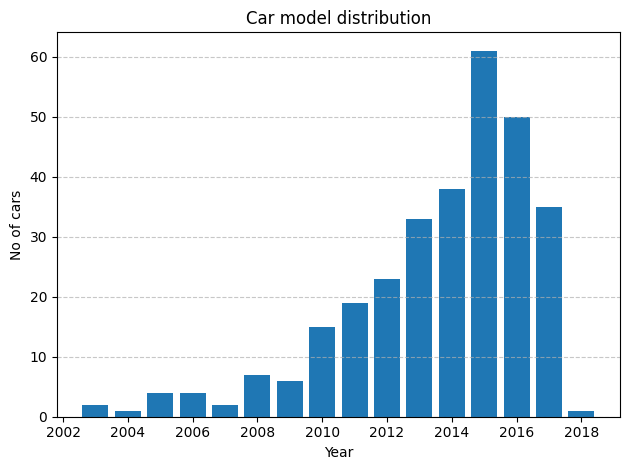

In [512]:
X=[2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018]
Y=[2,1,4,4,2,7,6,15,19,23,33,38,61,50,35,1]
plt.bar(X,Y)
plt.xlabel("Year")
plt.ylabel("No of cars")
plt.title("Car model distribution")
plt.tight_layout()
plt.grid(axis="y", linestyle="--",alpha=0.7)
plt.show()

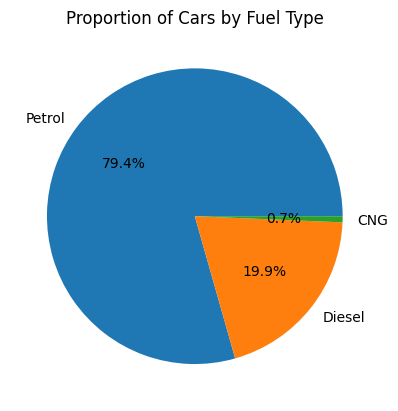

In [513]:

fuel_type_counts = df['Fuel_Type'].value_counts()
plt.pie(fuel_type_counts, labels=fuel_type_counts.index, autopct='%1.1f%%')
plt.title('Proportion of Cars by Fuel Type')
plt.show()


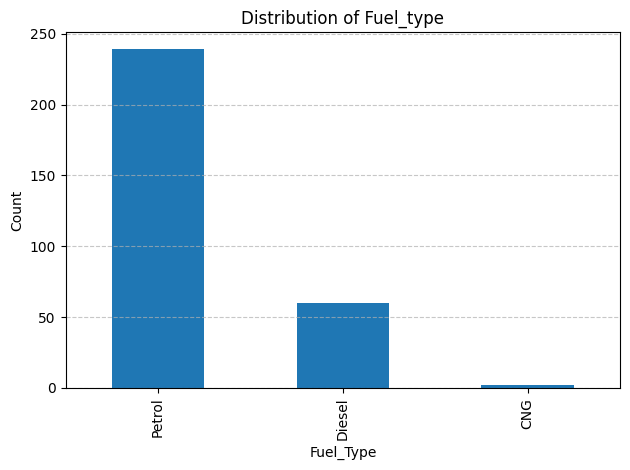

In [514]:
X=df["Fuel_Type"].value_counts()
X.plot(kind="bar")
plt.title("Distribution of Fuel_type")
plt.xlabel("Fuel_Type")
plt.ylabel("Count")
plt.tight_layout()
plt.grid(axis="y", linestyle="--",alpha=0.7)
plt.show()

In [515]:
df

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


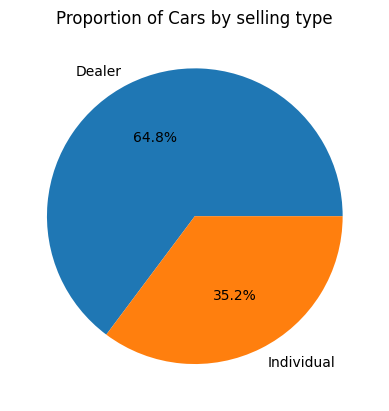

In [516]:

selling_type_counts = df['Selling_type'].value_counts()
plt.pie(selling_type_counts, labels=selling_type_counts.index, autopct='%1.1f%%')
plt.title('Proportion of Cars by selling type')
plt.show()


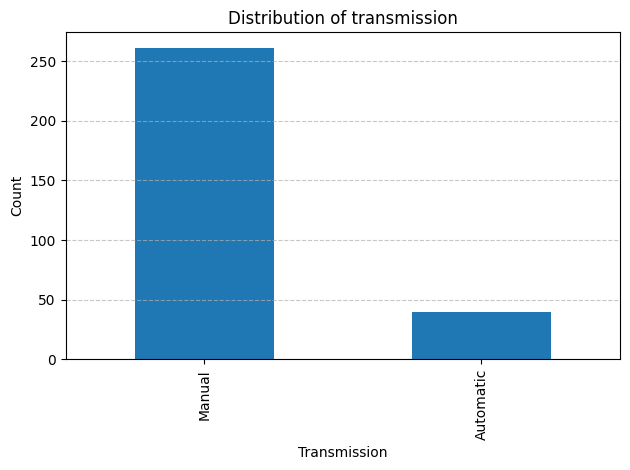

In [517]:
X=df["Transmission"].value_counts()
X.plot(kind="bar")
plt.title("Distribution of transmission")
plt.xlabel("Transmission")
plt.ylabel("Count")
plt.tight_layout()
plt.grid(axis="y", linestyle="--",alpha=0.7)
plt.show()

In [518]:
df["Year"].value_counts()

Year
2015    61
2016    50
2014    38
2017    35
2013    33
2012    23
2011    19
2010    15
2008     7
2009     6
2006     4
2005     4
2003     2
2007     2
2018     1
2004     1
Name: count, dtype: int64

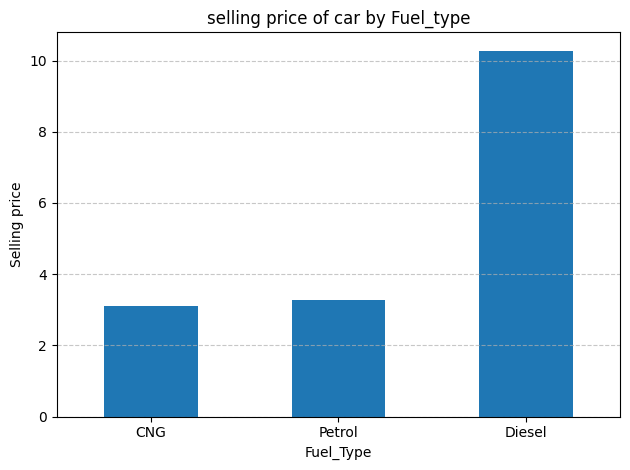

In [519]:
X=df.groupby("Fuel_Type")['Selling_Price'].mean().sort_values()
X.plot(kind="bar")
plt.title("selling price of car by Fuel_type")
plt.xlabel("Fuel_Type")
plt.ylabel("Selling price")
plt.xticks(rotation=360)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

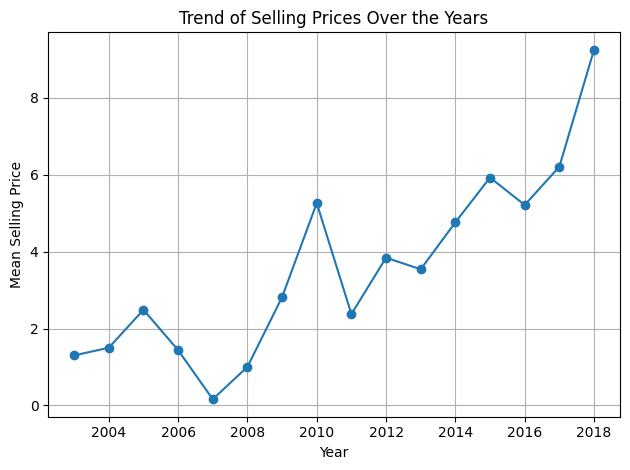

In [520]:
selling_price_trends = df.groupby('Year')['Selling_Price'].mean()
selling_price_trends.plot(marker='o', linestyle='-')
plt.title('Trend of Selling Prices Over the Years')
plt.xlabel('Year')
plt.ylabel('Mean Selling Price')
plt.grid(True)
plt.tight_layout()
plt.show()


In [521]:
df["Fuel_Type"]=df["Fuel_Type"].map({"Petrol":0, "Diesel":1, "CNG":2})

In [522]:
df["Transmission"]=df["Transmission"].map({"Manual":0, "Automatic":1,})

In [523]:
df["Selling_type"]=df["Selling_type"].map({"Dealer":0, "Individual":1,})

In [524]:
df["Owner"].value_counts()

Owner
0    290
1     10
3      1
Name: count, dtype: int64

In [525]:
df

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,1,0,0,0
297,brio,2015,4.00,5.90,60000,0,0,0,0
298,city,2009,3.35,11.00,87934,0,0,0,0
299,city,2017,11.50,12.50,9000,1,0,0,0


In [526]:
X=df.drop(columns=["Car_Name","Selling_Price"],axis=1)
y=df["Selling_Price"]

In [527]:
X.head()

,Year,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,2014,5.59,27000,0,0,0,0
1,2013,9.54,43000,1,0,0,0
2,2017,9.85,6900,0,0,0,0
3,2011,4.15,5200,0,0,0,0
4,2014,6.87,42450,1,0,0,0


In [528]:
y.head()

0    3.35
1    4.75
2    7.25
3    2.85
4    4.60
Name: Selling_Price, dtype: float64

In [529]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=42)
model=RandomForestRegressor()
model.fit(X_train,y_train)

RandomForestRegressor()

In [530]:
y_pred=model.predict(X_test)
y_pred

array([ 0.4419, 10.3713,  4.8845,  0.2236,  7.0605,  6.9105,  1.086 ,
        0.5475,  0.4757,  6.8085,  8.0099,  1.0564,  7.3005,  0.454 ,
        5.2637,  2.958 ,  1.12  , 15.124 ,  0.4786,  1.5635,  0.3454,
        8.1285,  4.7097,  2.8255,  0.4976,  3.187 ,  5.3535,  3.16  ,
        1.1869,  1.1532,  0.4129])

In [531]:
mse=mean_squared_error(y_test,y_pred)
print("mean squared value is: ",mse)

r2=r2_score(y_test,y_pred)*100
print("r2_score is: ",r2)

r2_train=model.score(X_train,y_train)*100
print("R-Squared(Training)",r2_train)

r2_test=model.score(X_test,y_test)*100
print("R-Squared(Test)",r2_test)


mean squared value is:  0.2691100045161284
r2_score is:  98.19562763956424
R-Squared(Training) 98.622997214602
R-Squared(Test) 98.19562763956424
